## 正态性检验

For this UCI Abalone data is used from http://archive.ics.uci.edu/ml/datasets/Abalone.  
这是一组鲍鱼的数据，包括年龄，大小，重量等。鲍鱼的年龄是通过将壳从圆锥体上切下来，染色，并通过显微镜计算环的数量来确定的。

#### 变量说明：

Sex / nominal / -- / M, F, and I (infant)

Length / continuous / mm / Longest shell measurement

Diameter / continuous / mm / perpendicular to length

Height / continuous / mm / with meat in shell

Whole weight 全重/ continuous / grams / whole abalone

Shucked weight 剥皮重量 / continuous / grams / weight of meat

Viscera weight 内脏重量 / continuous / grams / gut weight (after bleeding)

Shell weight 壳重 / continuous / grams / after being dried

Rings 环数/ integer / -- / +1.5 gives the age in years


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("abaloneData.txt")

In [3]:
print("The rows and columns are",df.shape)

The rows and columns are (4177, 9)


In [4]:
df.head(5)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [6]:
df.isna().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

### Histogram Plot

Text(0.5, 0.98, 'Histogram Plots for all Numeric Variables')

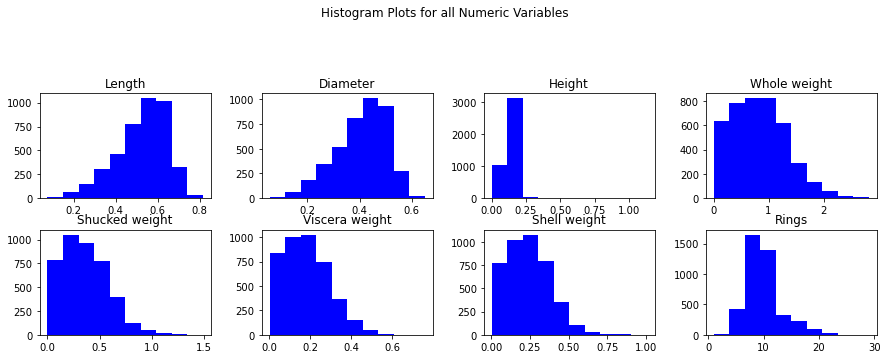

In [10]:
df.hist(layout=(5,4),color='blue', figsize=(15,12), grid=False)
plt.suptitle("Histogram Plots for all Numeric Variables")

### Q-Q plot

In [7]:
df1=df.drop(columns="Sex")

QQ plot of: Length


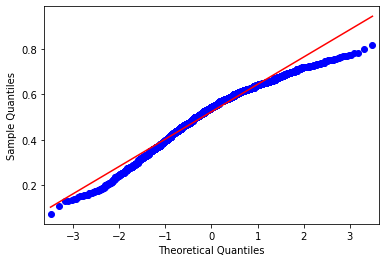

QQ plot of: Diameter


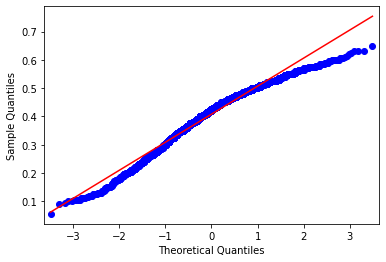

QQ plot of: Height


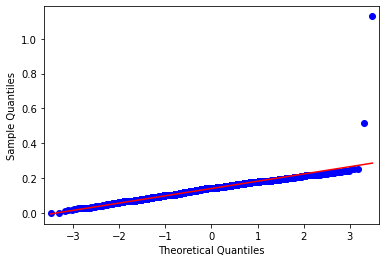

QQ plot of: Whole weight


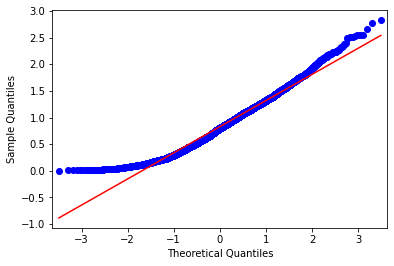

QQ plot of: Shucked weight


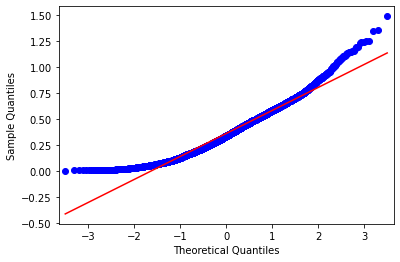

QQ plot of: Viscera weight


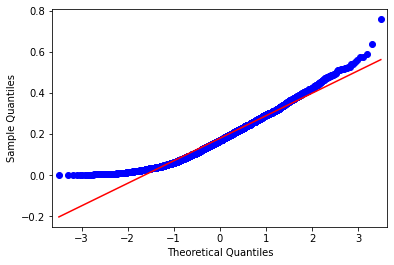

QQ plot of: Shell weight


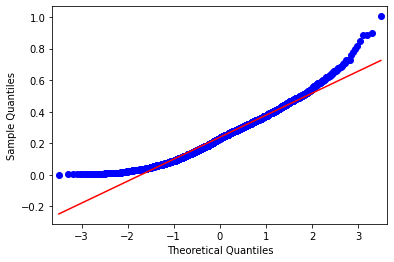

QQ plot of: Rings


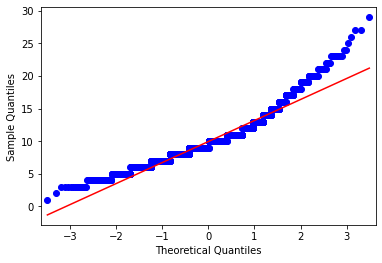

In [8]:
import statsmodels.api as sm
import pylab

for i, val in enumerate(df1):
    print('QQ plot of:', val)
    sm.qqplot(df[val], line='s')
    plt.show()

In [9]:
df2=df1.drop(columns="Rings")

### Box Plot

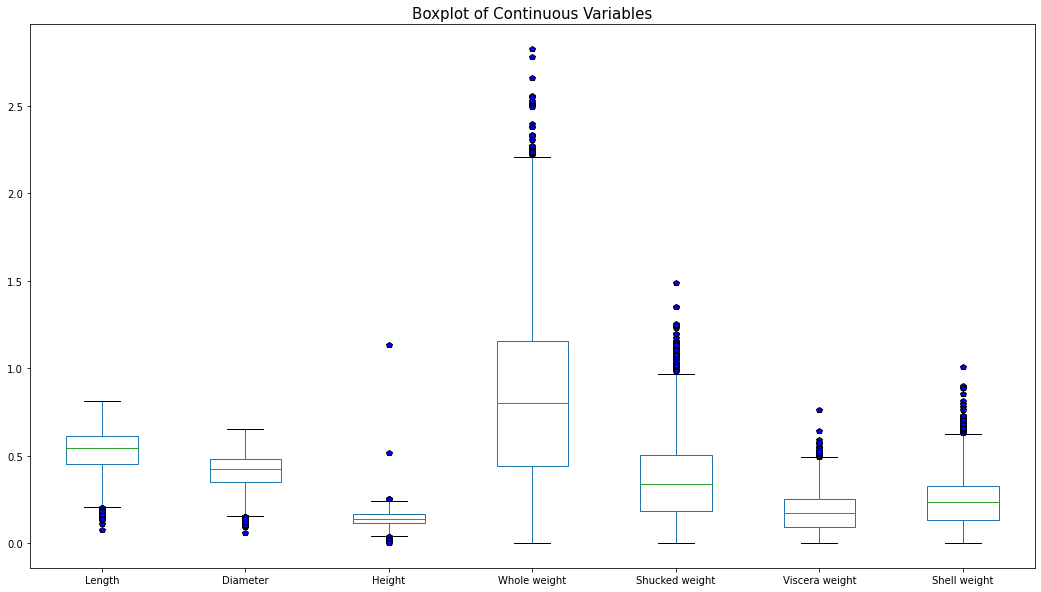

In [10]:
bit = dict(markerfacecolor='b', marker='p')
boxplot = df2.boxplot(figsize=(18,10), grid=False, flierprops=bit)
plt.title('Boxplot of Continuous Variables', fontsize=15);

### Statistical Tests

测试样本是否不同于正态分布。

该函数的假设检验的零假设是检测样本来自正态分布. 它基于D’Agostino和Pearson的检验，该检验结合了倾斜和峰度，产生了正态性的综合检验.

In [11]:
from scipy import stats

k2, p = stats.normaltest(df1)

alpha = 0.05

columns=df1.columns

In [12]:
columns

Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

### Shapiro-Wilk Test

This test is most popular to test the normality. It has below hypothesis:

H0= The sample comes from a normal distribution.

HA=The sample is not coming from a normal distribution.

In [13]:
for i in columns:
    print ([i])
    a,b= stats.shapiro(df[[i]])
    print ("Statistics", a, "p-value", b)
    if b < alpha:  
        print("The null hypothesis can be rejected")
    else:
        print("The null hypothesis cannot be rejected")

['Length']
Statistics 0.9696492552757263 p-value 7.377629143455696e-29
The null hypothesis can be rejected
['Diameter']
Statistics 0.970473051071167 p-value 1.6414551656441721e-28
The null hypothesis can be rejected
['Height']
Statistics 0.8896051645278931 p-value 0.0
The null hypothesis can be rejected
['Whole weight']
Statistics 0.9722852110862732 p-value 1.0143092052495122e-27
The null hypothesis can be rejected
['Shucked weight']
Statistics 0.962066650390625 p-value 9.362563887244321e-32
The null hypothesis can be rejected
['Viscera weight']
Statistics 0.9681379199028015 p-value 1.774917175594725e-29
The null hypothesis can be rejected
['Shell weight']
Statistics 0.9704266786575317 p-value 1.568463383716868e-28
The null hypothesis can be rejected
['Rings']
Statistics 0.9311649203300476 p-value 3.2763058745146386e-40
The null hypothesis can be rejected


### Kolmogorov–Smirnov test

这是一个非参数测试，也就是说，它没有关于数据分布的假设。Kolmogorov-Smirnov检验用于了解样本数据的分布是否符合某些理论分布

In [14]:
for i in columns:
    print ([i])
    a,b= stats.kstest(df[[i]], 'norm')
    print ("Statistics", a, "p-value", b)
    if b < alpha:  
        print("The null hypothesis can be rejected")
    else:
        print("The null hypothesis cannot be rejected")

['Length']
Statistics 0.7924638449586122 p-value 0.0
The null hypothesis can be rejected
['Diameter']
Statistics 0.7421538891941353 p-value 0.0
The null hypothesis can be rejected
['Height']
Statistics 0.8707618877599821 p-value 0.0
The null hypothesis can be rejected
['Whole weight']
Statistics 0.9976396556000835 p-value 0.0
The null hypothesis can be rejected
['Shucked weight']
Statistics 0.9316245531838383 p-value 0.0
The null hypothesis can be rejected
['Viscera weight']
Statistics 0.7763727075624006 p-value 0.0
The null hypothesis can be rejected
['Shell weight']
Statistics 0.8425515750696722 p-value 0.0
The null hypothesis can be rejected
['Rings']
Statistics 1.0 p-value 0.0
The null hypothesis can be rejected


### D'Agostino's K-squared test

In [15]:
for i in columns:
    print ([i])
    a,b= stats.normaltest(df[[i]])
    print (a, b)
    if b < alpha:  
        print("The null hypothesis can be rejected")
    else:
        print("The null hypothesis cannot be rejected")

['Length']
[242.15893836] [2.60528154e-53]
The null hypothesis can be rejected
['Diameter']
[222.13059303] [5.8204236e-49]
The null hypothesis can be rejected
['Height']
[3528.1390401] [0.]
The null hypothesis can be rejected
['Whole weight']
[174.21558397] [1.4776331e-38]
The null hypothesis can be rejected
['Shucked weight']
[332.14071399] [7.52593305e-73]
The null hypothesis can be rejected
['Viscera weight']
[212.14436441] [8.57899837e-47]
The null hypothesis can be rejected
['Shell weight']
[261.12003993] [1.98840008e-57]
The null hypothesis can be rejected
['Rings']
[813.44917871] [2.30014487e-177]
The null hypothesis can be rejected
